<a href="https://colab.research.google.com/github/dimashaheen/image_processing/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

In [ ]:
img = cv2.imread('DSCN0479-001.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
def filter_img(image):

  ##apply noise
  noise = np.random.normal(0,0.005,(image.shape[0],img.shape[1])).astype('uint8')
  new_pic = cv2.add(image,noise)
  cv2_imshow(new_pic)
  ##remove noise

  #box filter
  imgBox = cv2.boxFilter(new_pic, -1, (7,7))
  cv2_imshow(imgBox)

  #median
  imgMedian = cv2.medianBlur(new_pic,7)
  cv2_imshow(imgMedian)


  ##compute Mean Squared Error for box
  MSEBOX = np.square(np.subtract(image,imgBox)).mean()
  print('mse box filter =',MSEBOX)
  ##compute Peak Signal-to-Noise Ratio
  max_pixel = 255.0 ##always 255
  psnrBOX = 20 * math.log10(max_pixel / math.sqrt(MSEBOX))
  print('psnr box filter =',psnrBOX)


  ##compute Mean Squared Error for mediam
  MSE = np.square(np.subtract(image,imgMedian)).mean()
  print('mse median filter =',MSE)

  ##compute Peak Signal-to-Noise Ratio
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(MSE))
  print('psnr median filter =',psnr)

  ## filter that has the best results based on the error measures
  if (psnrBOX < psnr):
    print('median filter is better')
  else:
    print('blur filter is better')

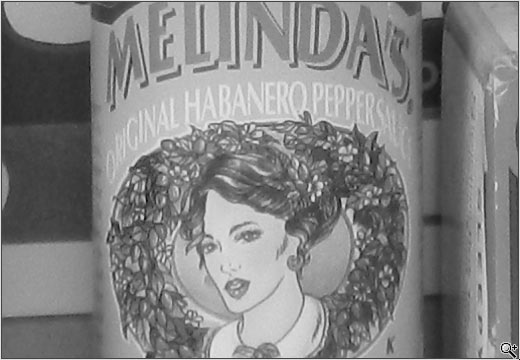

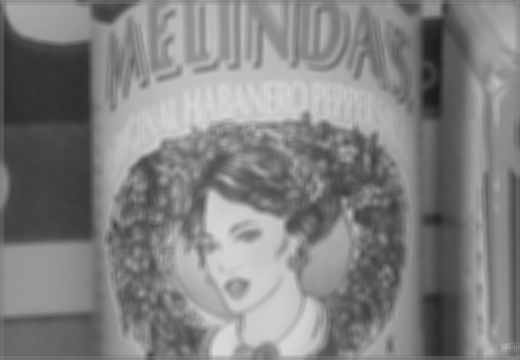

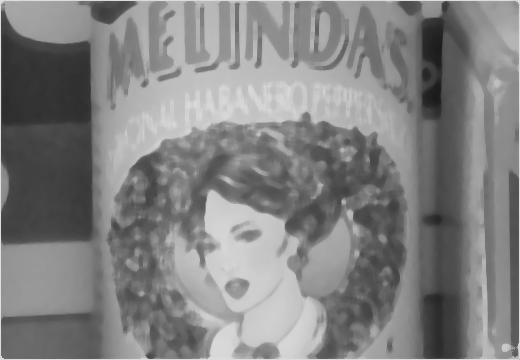

mse box filter = 47.77704594017094
psnr box filter = 31.338610670979207
mse median filter = 34.81883547008547
psnr median filter = 32.71266118996802
median filter is better


In [ ]:
filter_img(gray)